In [2]:
import pickle
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import math
from scipy.stats import f
#%pip install numpy_indexed
import datetime
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [3]:
df = pd.read_csv("../CleansedDataSets/cleansedTrainWOutlier.csv")
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.sort_index()
df.head()

,MDM current (A),Actual Volume Flow (Nm3/sec),VDV Pos [%] (%),IGV Pos [%] (%),Isentropic His (J/kg),Phi
timestamp,,,,,,
2022-01-01 13:47:59.341,84.934387,6.195832,75.0,82.0,51208.073545,0.115211
2022-01-01 13:48:29.359,85.083168,6.198653,75.0,82.0,51304.301254,0.115329
2022-01-01 13:49:59.618,85.037392,6.193850,75.0,82.0,51245.303827,0.115209
2022-01-01 13:50:29.749,84.877151,6.180439,75.0,82.0,51244.262393,0.114925
2022-01-01 13:50:59.792,85.140396,6.177068,75.0,82.0,51255.057696,0.114862


<AxesSubplot:>

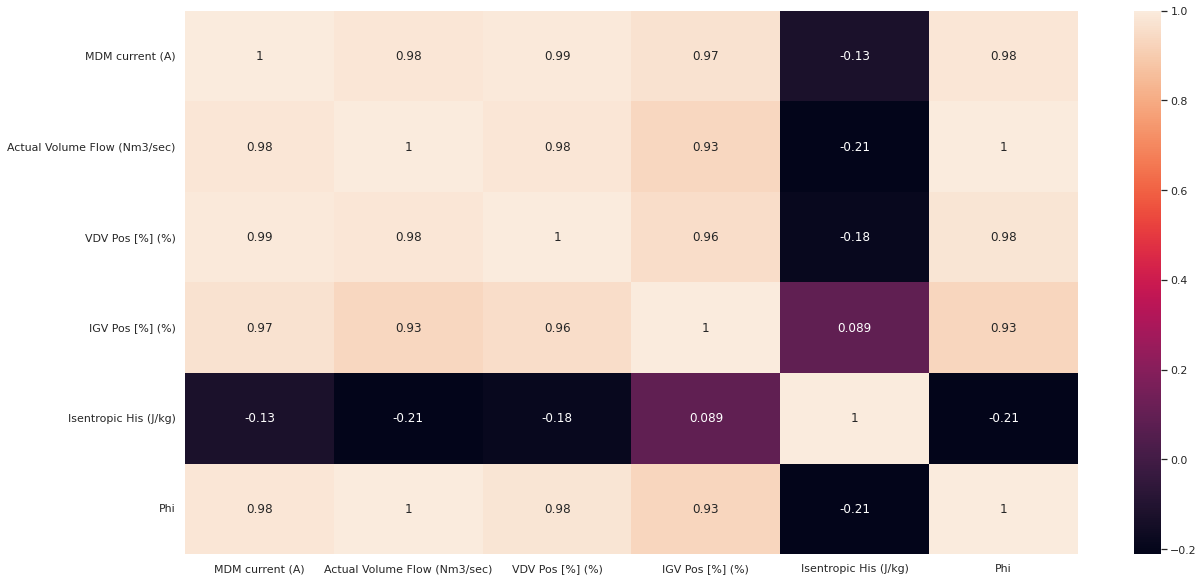

In [4]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.count()

## Kmeans

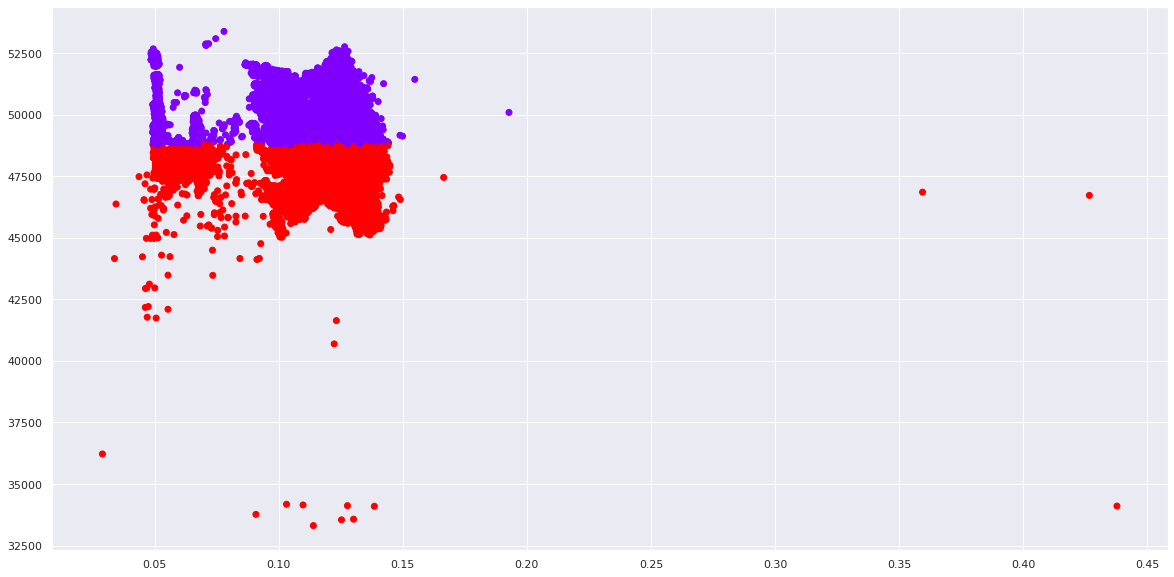

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = df[["Isentropic His (J/kg)"]]

km = KMeans(n_clusters=2)
km.fit(x)
identified_clusters = km.fit_predict(x)
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Phi'],data_with_clusters['Isentropic His (J/kg)'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [9]:

set1 = data_with_clusters.loc[data_with_clusters["Clusters"]==0]
set2 = data_with_clusters.loc[data_with_clusters["Clusters"]==1]

if(set1["Isentropic His (J/kg)"].mean() > set2["Isentropic His (J/kg)"].mean()):
    high_pressure = set1.copy()
    low_pressure = set2.copy()
else:
    low_pressure = set1.copy()
    high_pressure = set2.copy()
    
high_pressure.to_csv("DataSets/highpressuretraindata.csv")
low_pressure.to_csv("DataSets/lowpressuretraindata.csv")

In [10]:
with open("kmeans.pkl", "wb") as f:
    pickle.dump(km, f)